In [2]:
import pandas as pd 
import pip._vendor.requests as requests
import spotipy
import numpy as np
import matplotlib as plt
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from  sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier 
import re
scope1 = "user-library-read"
from spotipy.oauth2 import SpotifyClientCredentials
sp =spotipy.Spotify(auth_manager= SpotifyOAuth(client_id = "15fd015d4da742d0bf7da9c6ed3120c7", client_secret = "349c5181636e4e3cbb974b051db425fd", redirect_uri = "http://localhost", scope= scope1))
scope1 = "user-library-read"
from spotipy.oauth2 import SpotifyClientCredentials
sp =spotipy.Spotify(auth_manager= SpotifyOAuth(client_id = "15fd015d4da742d0bf7da9c6ed3120c7", client_secret = "349c5181636e4e3cbb974b051db425fd", redirect_uri = "http://localhost", scope= scope1))

In [ ]:
#gather data using soptify API

output = pd.DataFrame()
target_id = re.search(r'playlist\/(.*)\?', playlistlink).group(1)
name = sp.playlist(playlistlink)["name"]
read = sp.playlist_tracks(playlistlink)
for i in range (len(pd.DataFrame(read))) :
    song = pd.DataFrame(read["items"][i]).reset_index()
    song_uri = song.at[4, "track"]
    analysis = sp.audio_features(song_uri)
    analy = pd.DataFrame(analysis)
    output = pd.concat([output, analy])
output = output.drop(["mode", "duration_ms", "time_signature" , "type"], axis= 1)

In [3]:
output = pd.read_csv("total.csv")

In [6]:
output.loc[output["tag"] == "calm", "tag"] = 0
output.loc[output["tag"] == "happy", "tag"] = 1
output.loc[output["tag"] == "energ", "tag"] = 2
output.loc[output["tag"] == "sad", "tag"] = 3

In [7]:

# Normalize the DataFrame to be between 0 and 1
min_value = output[["Tempo"]].min().min()
max_value = output[["Tempo"]].max().max()
output["Tempo"] = (output[["Tempo"]] - min_value) / (max_value - min_value)

min_value = output[["Loudness"]].min().min()
max_value = output[["Loudness"]].max().max()
output["Loudness"] = (output[["Loudness"]] - min_value) / (max_value - min_value)

min_value = output[["Key"]].min().min()
max_value = output[["Key"]].max().max()
output["Key"] = (output[["Key"]] - min_value) / (max_value - min_value)



*starting to classifed*

In [8]:
#target cloumn
column_select = output[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
data_target = output[["tag"]].astype(int)
data_target.dtypes

tag    int64
dtype: object

In [10]:
song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(column_select, data_target, test_size= 0.2, random_state= 42)
df_result = []

for i in range(2000):
    model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes= (16, 10,), activation= "logistic",max_iter= 1000, learning_rate_init= 0.01, alpha = 0.01), n_jobs = -1)
    song_y_train = np.ravel(song_y_train)
    song_y_test = np.ravel(song_y_test)
    model.fit(song_x_train,song_y_train)
    song_y_predict = model.predict(song_x_test)
    output = {"RMSE": np.sqrt(mean_squared_error(song_y_test,song_y_predict)), "accuracy_score":metrics.accuracy_score(song_y_test, song_y_predict)}
    df_result.append(output)
        # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
        # print(metrics.accuracy_score(song_y_test, song_y_predict))
        # print("------")
df_analysis = pd.DataFrame(df_result)
df_analysis

,RMSE,accuracy_score
0,0.995004,0.694352
1,1.004971,0.694352
2,0.993333,0.707641
3,1.013202,0.694352
4,0.993333,0.707641
...,...,...
1995,1.013202,0.704319
1996,0.986621,0.720930
1997,0.993333,0.714286
1998,0.976467,0.720930


In [23]:
len(df_analysis)

2000

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  3.,  0.,  4.,
         2.,  1.,  2.,  5.,  6.,  6.,  4.,  8., 16., 13., 13., 24., 11.,
        17., 15., 34., 28., 22., 36., 33., 32., 45., 46., 44., 49., 55.,
        49., 51., 51., 64., 62., 63., 65., 66., 55., 54., 58., 60., 52.,
        58., 53., 45., 45., 49., 38., 34., 41., 37., 39., 32., 27., 20.,
        18., 25., 22., 11.,  7., 11., 10.,  7.,  6.,  2.,  9.,  2.,  6.,
         5.,  3.,  4.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.66477435, 0.66554378, 0.66631321, 0.66708264, 0.66785207,
        0.6686215 , 0.66939093, 0.67016036, 0.67092979, 0.67169922,
        0.67246865, 0.67323808, 0.67400751, 0.67477694, 0.67554636,
        0.67631579, 0.67708522, 0.67785465, 0.67862408, 0.67939351,
        0.68016294, 0.68093237, 0.6817018 , 0.68247123, 0.68324066,
        0.68401009, 0.68477952, 0.68554895, 0.68631838, 0.68708781,
        0.68785724, 0.6886

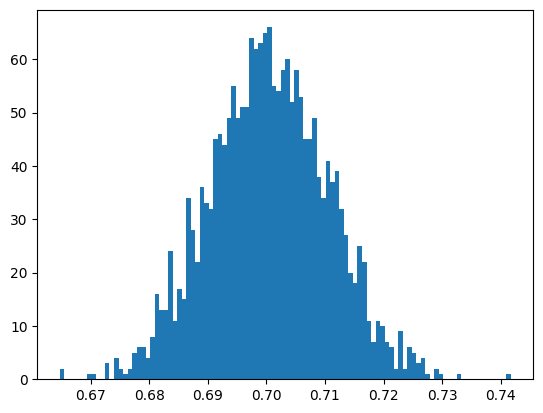

In [27]:
mean = df_analysis["accuracy_score"].mean()
std = df_analysis["accuracy_score"].std()
normal = np.random.normal(mean, std, size = len(df_analysis))
plt.hist(normal, bins = 100,)

(array([ 0.38120652,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.38120652,  0.38120652,
         0.        ,  0.38120652,  0.38120652,  0.76241305,  0.        ,
         0.        ,  0.38120652,  1.14361957,  0.        ,  0.        ,
         1.14361957,  1.90603262,  1.5248261 ,  2.28723914,  1.14361957,
         3.81206524,  4.57447829,  3.81206524,  3.04965219,  3.43085872,
         2.66844567,  3.43085872,  6.86171743,  7.62413048,  5.71809786,
        11.0549892 ,  8.76775005, 11.43619572, 12.57981529, 14.48584791,
        11.43619572, 13.72343486, 15.62946748, 22.10997839, 20.5851523 ,
        19.0603262 , 24.01601101, 24.01601101, 17.15429358, 25.92204363,
        22.87239144, 27.82807625, 20.20394577, 18.67911968, 20.20394577,
        19.82273925, 25.15963058, 25.54083711, 22.49118492, 22.87239144,
        19.0603262 , 21.34756534, 17.91670663, 17.15429358, 13.72343486,
        16.77308706, 12.57981529, 11.0549892 , 10.2

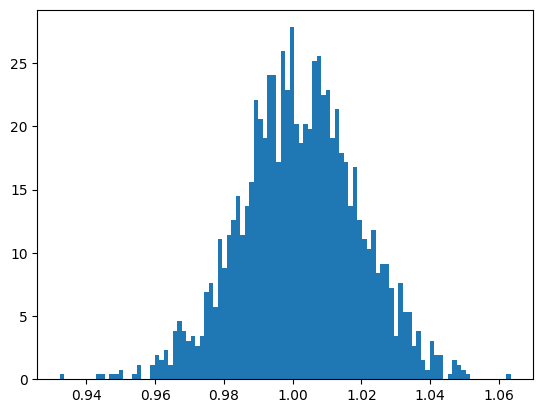

In [22]:
mean = df_analysis["RMSE"].mean()
std = df_analysis["RMSE"].std()
normal = np.random.normal(mean, std, size = len(df_analysis))
plt.hist(normal, bins = 100, density= True)